### Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
plt.style.use('seaborn')

### Load Dataset

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

--2022-03-26 01:53:12--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0s      

2022-03-26 01:53:13 (130 MB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]



In [ ]:
!ls

pima-indians-diabetes.data.csv	sample_data


In [ ]:
# mendefinisikan column soalnya datasetnya csv

cols_name = ['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class']

In [ ]:
df_diabetes = pd.read_csv('pima-indians-diabetes.data.csv', names = cols_name)

In [ ]:
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diabetes.tail()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df_diabetes.sample()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
630,7,114,64,0,0,27.4,0.732,34,1


In [ ]:
# mengecek jumlah kolom

df_diabetes.shape

(768, 9)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


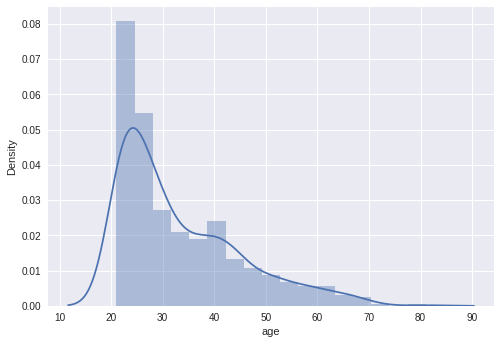

In [ ]:
# visualisasi standar

sns.distplot(df_diabetes['age'])

### Split Dataset

In [ ]:
# menentukan feature
features =  df_diabetes.values[:, :8]

In [ ]:
labels = df_diabetes.values[:, 8:]

In [ ]:
# split dataset

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.25, random_state=20)

In [ ]:
# menampilkan jumlah data latih

print('jumlah data latih ', X_train.shape)
print('jumlah data uji ', X_test.shape)


print('jumlah label latih ', y_train.shape)
print('jumlah label uji ', y_test.shape)

jumlah data latih  (576, 8)
jumlah data uji  (192, 8)
jumlah label latih  (576, 1)
jumlah label uji  (192, 1)


### Define Model

In [ ]:
# define model

model = Sequential()

In [ ]:
# menentukan layer

model.add(Dense(12, input_dim = 8, activation = 'relu')) # first layer = input layer
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


### Compile Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train Model

In [ ]:
# Fit data

model.fit(X_train, y_train, epochs=300, batch_size=8)


Epoch 1/300
72/72 [==============================] - 1s 1ms/step - loss: 1.7892 - accuracy: 0.5312
Epoch 2/300
72/72 [==============================] - 0s 1ms/step - loss: 0.8503 - accuracy: 0.5938
Epoch 3/300
72/72 [==============================] - 0s 1ms/step - loss: 0.7996 - accuracy: 0.6372
Epoch 4/300
72/72 [==============================] - 0s 2ms/step - loss: 0.7590 - accuracy: 0.6372
Epoch 5/300
72/72 [==============================] - 0s 1ms/step - loss: 0.7339 - accuracy: 0.6372
Epoch 6/300
72/72 [==============================] - 0s 1ms/step - loss: 0.7087 - accuracy: 0.6510
Epoch 7/300
72/72 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.6615
Epoch 8/300
72/72 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.6510
Epoch 9/300
72/72 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6580
Epoch 10/300
72/72 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.6806
Epoch 11/

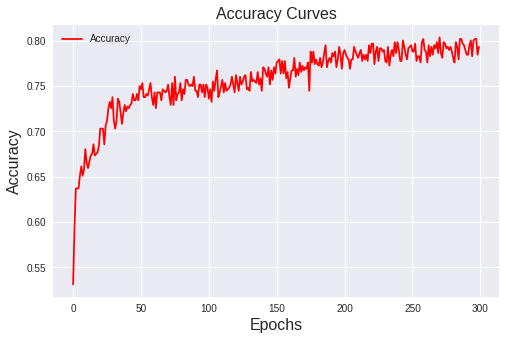

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Accuracy'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

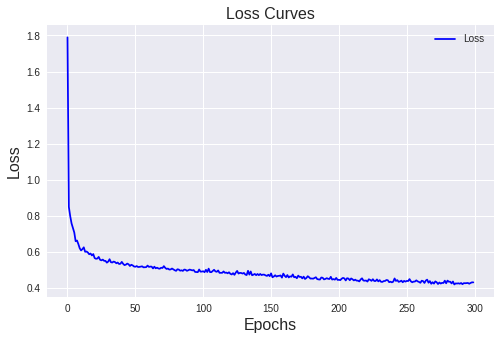

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['loss'], 'b')
plt.legend(['Loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

In [ ]:
# evaluate the keras model

_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 70.31
